In [42]:
# adp 18회 - 월별 교통사고량 데이터 (2010.1월~2019.12월)
# 정상시계열인지 확인 및 조정
# ARIMA 모델 3가지 제시
# 1가지 모델 최종 선택하고 이유 서술
# 최종 예측하고 실제결과와 비교평가
# 그 평가방법을 사용한 이유 서술

In [43]:
### 월별 교통사고량 데이터를 adp18회 문제에 맞게 가공
### (공공데이터 포털 사이트에서 검색) 

import pandas as pd

a1 = pd.read_csv('data/traffic/도로교통공단_월별 교통사고 통계_20201231.csv', encoding='CP949')
a2 = pd.read_csv('data/traffic/도로교통공단_월별 교통사고(2016).csv', encoding='CP949')
a3 = pd.read_csv('data/traffic/도로교통공단_월별 교통사고(2017).csv', encoding='CP949')
a4 = pd.read_csv('data/traffic/도로교통공단_월별 교통사고(2018).csv', encoding='CP949')
a5 = pd.read_csv('data/traffic/도로교통공단_월별 교통사고(2019).csv', encoding='CP949')
a6 = pd.read_csv('data/traffic/도로교통공단_월별_교통사고_통계(2015).csv', encoding='CP949')
 


In [44]:
a1['year']='2020'
a1.columns = ['월','사고건수','사망자수','중상자수','경상자수','부상신고자수','year']
a1.head()

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,year
0,1,16968,277,5063,18696,1683,2020
1,2,16285,222,4463,17530,1565,2020
2,3,14949,239,4356,16155,1312,2020
3,4,16186,213,4844,17459,1478,2020
4,5,18184,254,5470,19563,1758,2020


In [45]:
a2['year']='2016'
a2.head()

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,year
0,1,17067,336,6603,18030,1690,2016
1,2,15664,292,5932,16513,1576,2016
2,3,17946,310,6681,18059,1869,2016
3,4,19452,353,7424,19815,1977,2016
4,5,19554,347,7444,19667,2061,2016


In [46]:
a3['year']='2017'
a3.head()

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,year
0,1,16970,353,6219,18159,1721,2017
1,2,14832,280,5349,15588,1386,2017
2,3,17047,295,6268,17157,1621,2017
3,4,17717,293,6510,18238,1782,2017
4,5,18502,366,6884,18493,1891,2017


In [47]:
a4['year']='2018'
a4.head()

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,year
0,1,17026,304,5745,18115,1578,2018
1,2,16208,275,5518,17558,1554,2018
2,3,17022,310,5918,17528,1569,2018
3,4,17992,303,6230,18630,1783,2018
4,5,18636,309,6559,19409,1866,2018


In [48]:
a5['year']='2019'
a5.head()

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,year
0,1,16552,296,5487,17249,1533,2019
1,2,14752,203,4772,16410,1430,2019
2,3,18133,252,5806,19390,1712,2019
3,4,19104,286,6224,20305,1909,2019
4,5,20779,305,6573,22332,2172,2019


In [49]:
a6['year']='2015'
a6.head()

,월,사고건수,사망자수,중상자수,경상자수,부상신고자수,year
0,1,16902,381,6980,17146,1761,2015
1,2,14939,296,6268,15294,1437,2015
2,3,18616,378,7550,18571,1800,2015
3,4,19386,354,7717,19800,1914,2015
4,5,20543,389,8324,20727,2213,2015


In [96]:
a = pd.concat([a6,a2,a3,a4,a5,a1], axis=0)

In [97]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       72 non-null     int64 
 1   사고건수    72 non-null     int64 
 2   사망자수    72 non-null     int64 
 3   중상자수    72 non-null     int64 
 4   경상자수    72 non-null     int64 
 5   부상신고자수  72 non-null     int64 
 6   year    72 non-null     object
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [145]:
### 분석용 데이터 - 월별 사고건수 (2015년1월 ~ 2020년12월)

ddf = a[['year','월','사고건수']]
ddf.columns = ['year','month','freq']

ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    72 non-null     object
 1   month   72 non-null     int64 
 2   freq    72 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


In [146]:
# 연월 컬럼 생성
ddf['y+m'] = pd.date_range("2015/01/30",periods=72,freq="M") #월


C:\Users\getou\AppData\Local\Temp/ipykernel_7488/3537047984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['y+m'] = pd.date_range("2015/01/30",periods=72,freq="M") #월


In [147]:
# 생성한 연월컬럼 순서 역순으로 변경할때
dd = pd.date_range("2015/01/30",periods=72,freq="M") #월단위로 72개(6년*12개월)

dd_r = dd.sort_values(ascending=False)
dd_r

DatetimeIndex(['2020-12-31', '2020-11-30', '2020-10-31', '2020-09-30',
               '2020-08-31', '2020-07-31', '2020-06-30', '2020-05-31',
               '2020-04-30', '2020-03-31', '2020-02-29', '2020-01-31',
               '2019-12-31', '2019-11-30', '2019-10-31', '2019-09-30',
               '2019-08-31', '2019-07-31', '2019-06-30', '2019-05-31',
               '2019-04-30', '2019-03-31', '2019-02-28', '2019-01-31',
               '2018-12-31', '2018-11-30', '2018-10-31', '2018-09-30',
               '2018-08-31', '2018-07-31', '2018-06-30', '2018-05-31',
               '2018-04-30', '2018-03-31', '2018-02-28', '2018-01-31',
               '2017-12-31', '2017-11-30', '2017-10-31', '2017-09-30',
               '2017-08-31', '2017-07-31', '2017-06-30', '2017-05-31',
               '2017-04-30', '2017-03-31', '2017-02-28', '2017-01-31',
               '2016-12-31', '2016-11-30', '2016-10-31', '2016-09-30',
               '2016-08-31', '2016-07-31', '2016-06-30', '2016-05-31',
      

In [148]:
ddf.head()

,year,month,freq,y+m
0,2015,1,16902,2015-01-31
1,2015,2,14939,2015-02-28
2,2015,3,18616,2015-03-31
3,2015,4,19386,2015-04-30
4,2015,5,20543,2015-05-31


In [149]:
### 분석용 데이터 가공완료

df = ddf[['y+m','freq']].reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   72 non-null     int64         
 1   y+m     72 non-null     datetime64[ns]
 2   freq    72 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.8 KB


In [150]:
df.head(60)

,index,y+m,freq
0,0,2015-01-31,16902
1,1,2015-02-28,14939
2,2,2015-03-31,18616
3,3,2015-04-30,19386
4,4,2015-05-31,20543
5,5,2015-06-30,18649
6,6,2015-07-31,20278
7,7,2015-08-31,19864
8,8,2015-09-30,20811
9,9,2015-10-31,21587


In [141]:
df.drop(df['index'])
df['freq'].astype('float64')

0     16902.0
1     14939.0
2     18616.0
3     19386.0
4     20543.0
       ...   
67    17616.0
68    18124.0
69    19255.0
70    18438.0
71    16330.0
Name: freq, Length: 72, dtype: float64

In [142]:
df.tail()

,index,y+m,freq
67,7,2020-08-31,17616
68,8,2020-09-30,18124
69,9,2020-10-31,19255
70,10,2020-11-30,18438
71,11,2020-12-31,16330


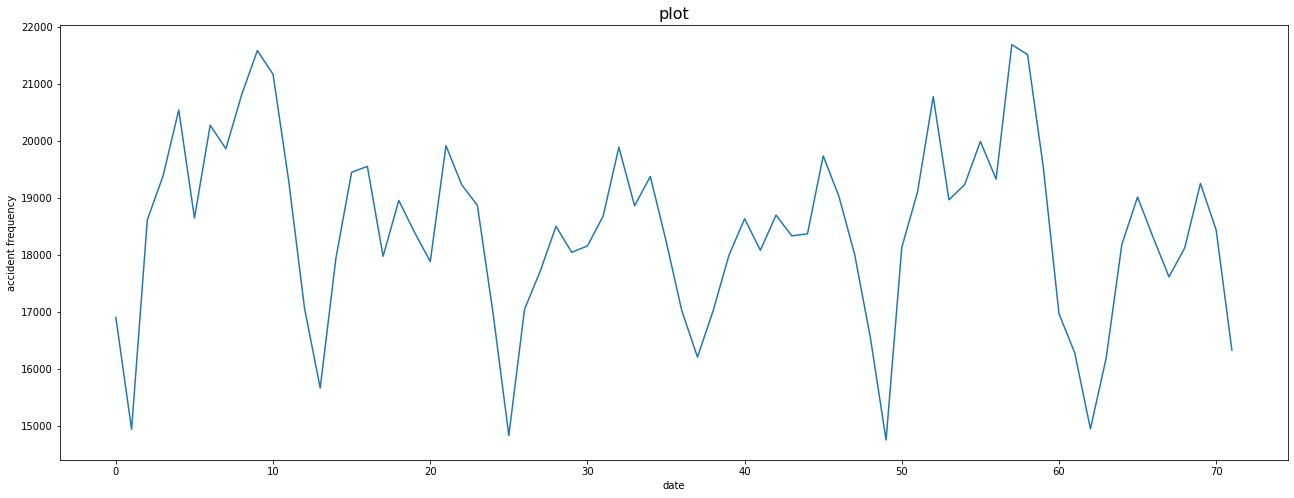

In [144]:
# 정상시계열인지 확인 및 조정

### 정상시계열 여부 검토 (https://rfriend.tistory.com/694)
###  [1] 시계열 그래프 (time series plot)
###  [2] 통계적 가설 검정 (statistical hypothesis test)
###  [3] 자기상관함수(ACF), 편자기상관함수(PACF)



### (1) 시계열 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(22,8))
plt.plot(df.freq)
plt.title('plot', fontsize=16)
plt.xlabel('date')
plt.ylabel('accident frequency')
plt.show()

In [154]:
### 시계열 형태의 ts 데이터로 변환
# https://leedakyeong.tistory.com/entry/Python-%EB%82%A0%EC%94%A8-%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0Kaggle%EB%A1%9C-ARIMA-%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0
    
d = df[['y+m','freq']]
ts_d = d.loc[:, ['y+m','freq']]
ts_d.index = ts_d['y+m']
ts = ts_d.drop('y+m',axis=1)
ts

,freq
y+m,
2015-01-31,16902
2015-02-28,14939
2015-03-31,18616
2015-04-30,19386
2015-05-31,20543
...,...
2020-08-31,17616
2020-09-30,18124
2020-10-31,19255


In [176]:
ts.freq = ts['freq'].astype('float32')

C:\Users\getou\AppData\Local\Temp/ipykernel_7488/3022572965.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts['freq'], model = 'additive', freq=12)


<Figure size 720x432 with 0 Axes>

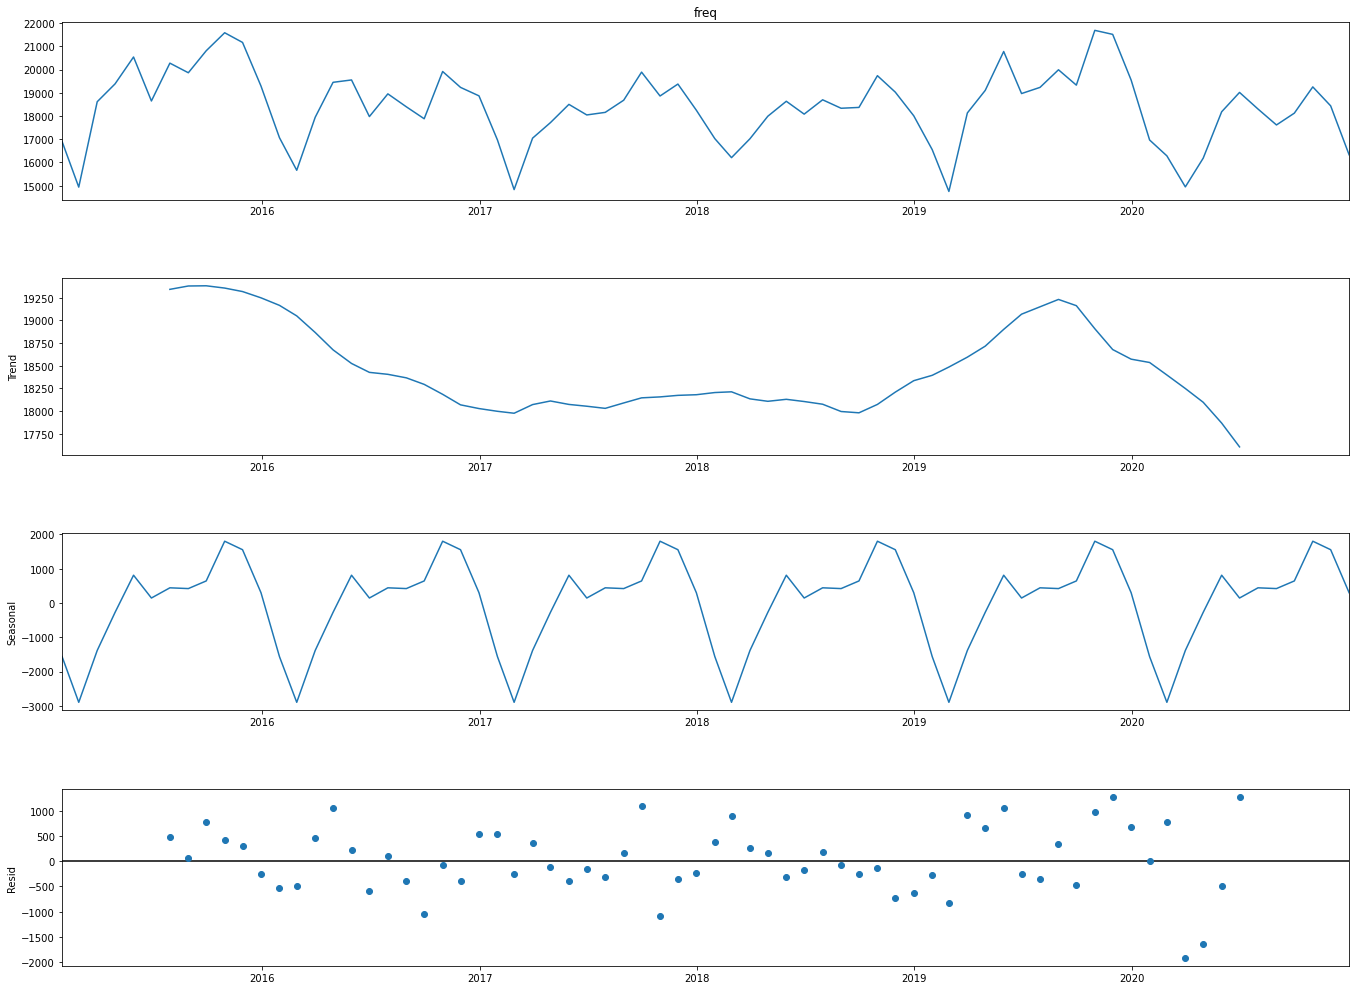

In [177]:
### seasonal decompose()를 활용하여 분해 (계절성있는지 검토)

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['freq'], model = 'additive', freq=12) 
# 월별데이터여서 freq=12로 설정. 분기별 freq=4, 주별 freq=7
# 계절성 주기가 1년이면 freq=365

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)


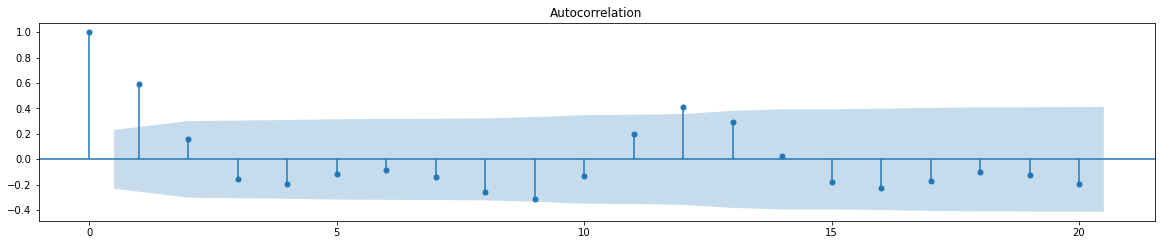

In [178]:
### seasonal 패턴이 있는 것으로 보임 -> 정상성 의심됨. 
### 정상성 판단하기위해 ACF 그래프 
### -> ACF값이 아주 천천히 감소하는 것은 정상성을 만족하지 않는다는 것
###    ACF값이 금새 0에 수렴한다는 것

import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)


In [179]:
### 단위근 검정인 ADF 검정으로 정상성 확인
### H0 : 정상성을 만족하지 않는다  H1 : 정상성을 만족한다 

from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('critical values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

### -> p-value <0.01 이므로 귀무가설 기각. 정상성을 만족한다고 판단

ADF statistic: -5.298854
p-value: 0.000006
critical values: 
	1%: -3.527
	5%: -2.904
	10%: -2.589


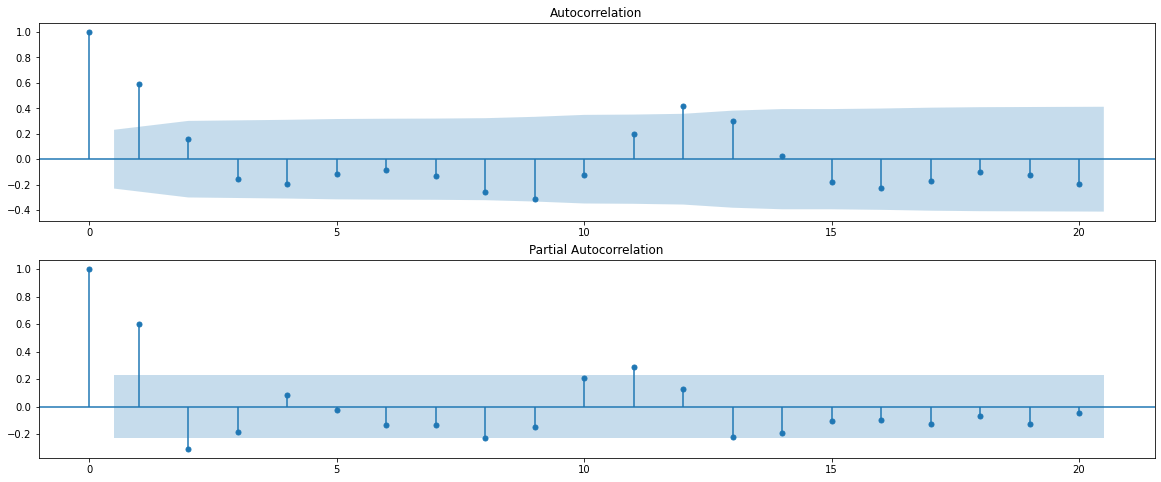

In [180]:
### 정상성을 만족하는 데이터로 ACF와 PACF 를 그려서 ARIMA 모형의 p와 q결정
### -> ARMA(p,q) 에서 PACF 점차 감소하여 0에 접근 (시차 p이후에 0) 
###    ACF 점차 감소하여 0에 접근 (시차 q이후에 0)
### AR(p) 는 PACF, MA(q)는 ACF 바탕으로 판단

import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=20, ax=ax2) 

### -> ACF 에서 0에 수렴하는 차수 q=1 이후
###    PACF 에서 0에 수렴하는 차수 p=2 이후
###    정상성을 만족하면 d=0 
### => ARIMA(2,0,1) = ARMA(2,1)
### p와 q는 3 미만으로 선택하는 것이 이상적 (간결성의 원칙)
### 모형 개수 증가하면 복잡해지고 추정의 효율성도 떨어짐

In [181]:
# ARIMA 모델 3가지 제시
### -> ARIMA 모델은 시계열 데이터의 정상성(stationary)을 전제조건으로 함

from statsmodels.tsa.arima_model import ARIMA

### R의 auto.arima()를 py로 구현한 코드 (2021년 3월 게시)
### https://bluemumin.github.io/adp/2021/03/10/ADP-20%ED%9A%8C-ADP-%EC%8B%A4%EA%B8%B0-python-%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D(Arima,-%EC%9E%94%EC%B0%A8%EB%B6%84%EC%84%9D)/

def my_auto_arima(data, order, sort='AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []

    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(ts, order=(p, d, q))

                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass

                result_df = pd.DataFrame(list(zip(order_list, aic_list)),
                                         columns=['order', 'AIC'])
                result_df.sort_values(sort, inplace=True)

    return result_df


my_auto_arima(ts, [2, 2, 2])


### 탐색결과 AIC 가 가장 낮은 3개의 모델
### -> ARIMA(0,1,0) / ARIMA(0,1,1) / ARIMA(1,1,0)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M wil

,order,AIC
2,p0 d1 q0,1233.740954
3,p0 d1 q1,1235.595330
6,p1 d1 q0,1235.622009
5,p1 d0 q1,1236.064236
4,p1 d0 q0,1237.807264
1,p0 d0 q1,1240.886176
0,p0 d0 q0,1267.678822


In [182]:
### 탐색결과 AIC 낮은 순으로 3개의 모델
### -> ARIMA(0,1,0) / ARIMA(0,1,1) / ARIMA(1,1,0)

# 1가지 모델 최종 선택하고 이유 서술
### -> ARIMA(0,1,0) 의 AIC가 가장 낮았기 때문



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M wil

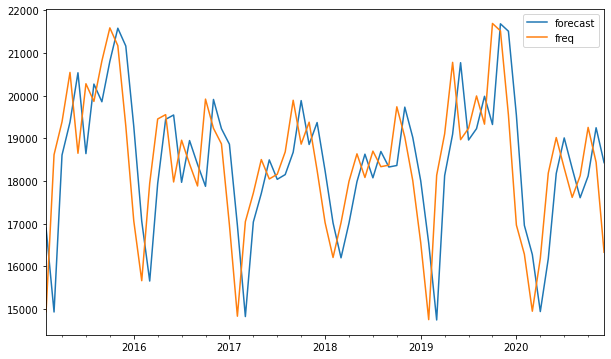

(array([16321.94366197, 16313.88732394, 16305.83098592, 16297.77464789,
       16289.71830986]), array([1395.78049131, 1973.93170091, 2417.56272716, 2791.56098262,
       3121.06006024]), array([[13586.26416868, 19057.62315527],
       [12445.05228222, 20182.72236567],
       [11567.49511031, 21044.16686152],
       [10826.4156613 , 21769.13363447],
       [10172.5529982 , 22406.88362152]]))


In [187]:
# 최종 예측하고 실제결과와 비교평가
# 그 평가방법을 사용한 이유 서술

model = ARIMA(ts, order=(0, 1, 0))
model_fit = model.fit()
    
model_fit.plot_predict()
plt.show()

fore = model_fit.forecast(steps=5)  
print(fore)
### forecast()로 이후의 몇일까지 예측할지 지정하는 방식이지만 
### train / test 분할 안했으므로 그래프가 동일하게 나옴

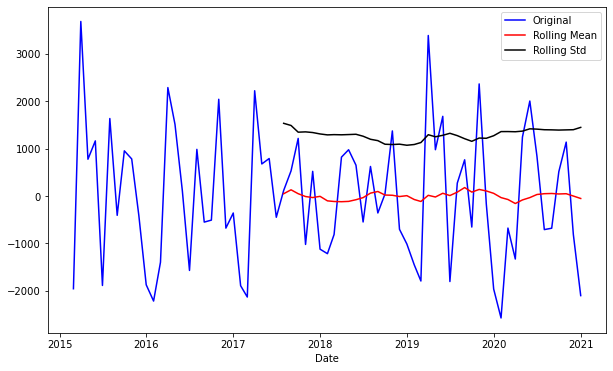

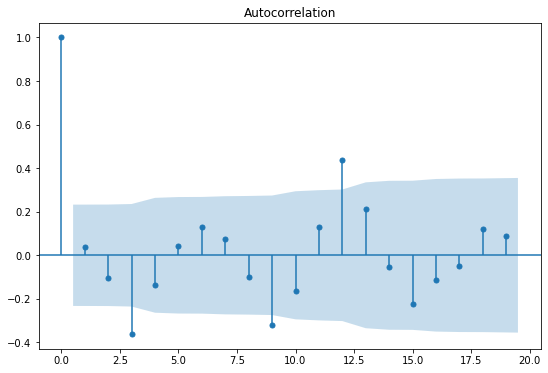

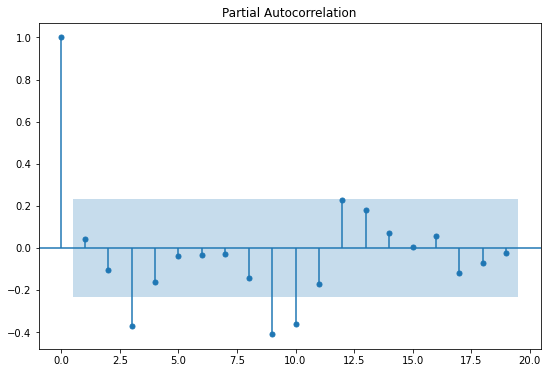

In [190]:
### 최적의 모델에서 나온 잔차를 그래프로 그리고 adf, pcf 분석을 통해서 
### 잔차가 정상성 가지는지 확인하고 
### qqplot과 shapiro test, normaltest로 정규분포 가지는지 확인하고
### durbin_watson 검증을 통해 잔차의 자기상관 관계여부 확인

def plot_rolling(ts, interval):
    
    rolmean = ts.rolling(interval).mean()
    rolstd = ts.rolling(interval).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(10, 6))
    plt.xlabel('Date')
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show()
    
plt.rcParams['figure.figsize'] = [9, 6]
plot_rolling(model_fit.resid, 30)
sm.graphics.tsa.plot_acf(model_fit.resid)
sm.graphics.tsa.plot_pacf(model_fit.resid)
plt.show()

### 평균과 분산이 어느정도 일정해보이고, 
### ACF, PACF 그래프에서도 절단점이 발견되지 않아서 정상시계열로 추측


In [192]:
### ADF 검증 통해 확인한 결과, p-value가 0.2로
### 귀무가설 (H0: 비정상시계열이다) 을 기각하지 못함 -> 비정상시계열

from statsmodels.tsa.stattools import adfuller
result = adfuller(model_fit.resid)
print(f'ADF statitic: {result[0]:.3f}')
print(f'p-value: {result[1]:.3f}')

ADF statitic: -2.081
p-value: 0.252


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


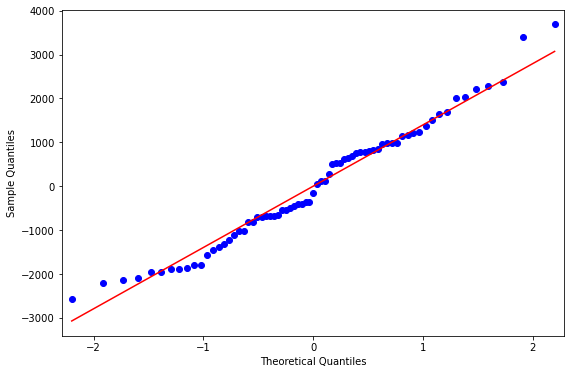

Statistics=0.975, p=0.167
Sample looks Gaussian (fail to reject H0)
----------------
Statistics=1.567, p=0.457
Sample looks Gaussian (fail to reject H0)


In [194]:
### 잔차가 정규분포인지를 확인해본 결과,
### p-value가 0.05보다 크게 나와서, 
### 귀무가설(H0: 해당 잔차가 정규분포를 따른다)을 채택함


from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest

qqplot(model_fit.resid, line='s')
plt.show()

stat1, p1 = shapiro(model_fit.resid)
print('Statistics=%.3f, p=%.3f' % (stat1, p1))
# interpret
alpha = 0.05
if p1 > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

print("----------------")

stat2, p2 = normaltest(model_fit.resid)
print('Statistics=%.3f, p=%.3f' % (stat2, p2))
# interpret
alpha = 0.05
if p2 > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

In [193]:
### durbin_watson의 자기상관을 검토한 결과, 2에 가까운 값으로 나타남
### -> 2에 가까울수록 auto correlation을 가지고 있지 않다는 가설을 채택할 수 있음
###    (0에 가까우면 양의 auto corr, 4에 가까우면 음의 auto corr을 가짐)
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model_fit.resid)

1.8606143844984504

<AxesSubplot:xlabel='y+m'>

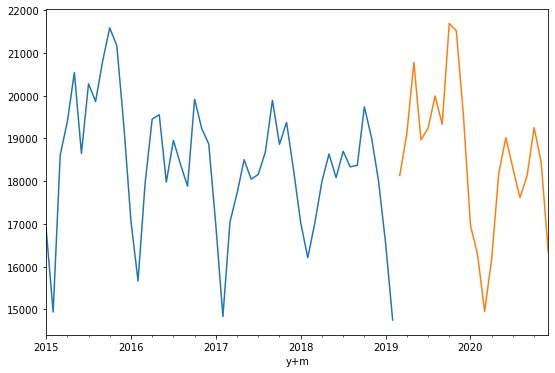

In [198]:
### py로 auto.arima 가능한 코드 (2021년 9월 게시)
### https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/


from pmdarima.arima import ndiffs
import pmdarima as pm


### 데이터 분할 및 시각화
y_train = ts['freq'][:int(0.7*len(ts))]
y_test = ts['freq'][int(0.7*len(ts)):]
y_train.plot()
y_test.plot()


In [199]:
### 차분이 필요한지 검토 

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")


추정된 차수 d = 1


In [200]:
### ARIMA 모형 적합 (train set으로 학습하고 test set으로 예측)

model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=847.844, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=848.728, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=849.950, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=845.902, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=846.024, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.173 seconds


In [ ]:
"""
auto_arima에 주요한 옵션들
- y: array 형태의 시계열 자료
- d (기본값 = none)
 : 차분의 차수, 이를 지정하지 않으면 실행 기간이 매우 길어질 수 있음
- start_p (기본값 = 2), max_p (기본값 = 5)
 : AR(p)를 찾을 범위 (start_p에서 max_p까지 찾는다!)
- start_q (기본값 = 2), max_q (기본값 = 5)
 : AR(q)를 찾을 범위 (start_q에서 max_q까지 찾는다!)
- m (기본값 = 1)
 : 계절적 차분이 필요할 때 쓸 수 있는 모수로 m=4이면 분기별, 
    m=12면 월별, m=1이면 계절적 특징을 띠지 않는 데이터를 의미한다. 
    m=1이면 자동적으로 seasonal 에 대한 옵션은 False로 지정된다.
- seasonal (기본값 = True): 계절성 ARIMA 모형을 적합할지의 여부
- stepwise (기본값 = True): 최적의 모수를 찾기 위해 쓰는 
  힌드만 - 칸다카르 알고리즘을 사용할지의 여부, 
   False면 모든 모수 조합으로 모형을 적합한다.
- trace (기본값 = False)
 : stepwise로 모델을 적합할 때마다 결과를 프린트하고 싶을 때 사용


"""

In [201]:
### 정말 간단하게 필수적인 옵션만 갖고 적합하는 코드
### d의 값을 1로 둔 이유는, 위에서 ndiffs함수로 추정된 d의 값이 1이였기 때문
 
model = pm.auto_arima(y_train, d=1, seasonal=False, trace=True)
model.fit(y_train)

### -> 결과에서 최적의 모델이 ARIMA(0,1,0) 으로 나타남
### => 1차 차분했을때 백색잡음 임을 의미하고, 
###    임의보행모형(random walk model)을 따른다는 것을 알 수 있음

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=847.844, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=848.728, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=849.950, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=845.902, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=846.024, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.311 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [202]:
### 잔차검정
### -> 잔차가 백색잡음 과정인지(=정상성 만족하는지),
###    정규성 및 등분산성 만족하는지 검토

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   50
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -421.951
Date:                Mon, 21 Mar 2022   AIC                            845.902
Time:                        04:56:59   BIC                            847.793
Sample:                             0   HQIC                           846.619
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.744e+06   3.82e+05      4.565      0.000    9.95e+05    2.49e+06
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.17
Prob(Q):                              0.93   Pr

In [ ]:
"""결과 해석
Ljung-Box (Q) / Heteroskedasticity (H) / Jarque-Bera (JB)에 대한 부분
-> 잔차에 대한 검정 통계량들입니다.

- Ljung-Box (Q) 융-박스 검정 통계량는 잔차가 백색잡음인지 검정한 통계량
- Prob (Q) 값을 보면 0.93이므로 유의수준 0.05에서 귀무가설을 기각하지 못함
- Ljung-Box (Q) 통계량의 귀무가설은 “잔차(residual)가 백색잡음(white noise) 시계열을 따른다”이므로,
- 위 결과를 통해 시계열 모형이 잘 적합되었고 
- 남은 잔차는 더이상 자기상관을 가지지 않는 백색 잡음임을 확인

- Jarque-Bera (JB) 자크-베라 검정 통계량은 잔차가 정규성을 띠는지 검정한 통계량
- Prob(JB)값을 보면 0.56으로 유의 수준 0.05에서 귀무가설을 채택 
- Jarque-Bera (JB) 통계량의 귀무가설은 “잔차가 정규성을 만족한다”이므로,
- 위 결과를 통해 “잔차가 정규성을 따름”을 확인

- Heteroskedasticity (H) 이분산성 검정 통계량은 잔차가 이분산을 띠지 않는지 검정한 통계량

- 또한, 잔차가 정규분포를 따른다면, 경험적으로
비대칭도 (Skew)는 0에 가까워야 하고 -> 0.35로 0에 가까움
첨도 (Kurtosis)는 3에 가까워야 함 -> 2.7로 3에 가까움
"""

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


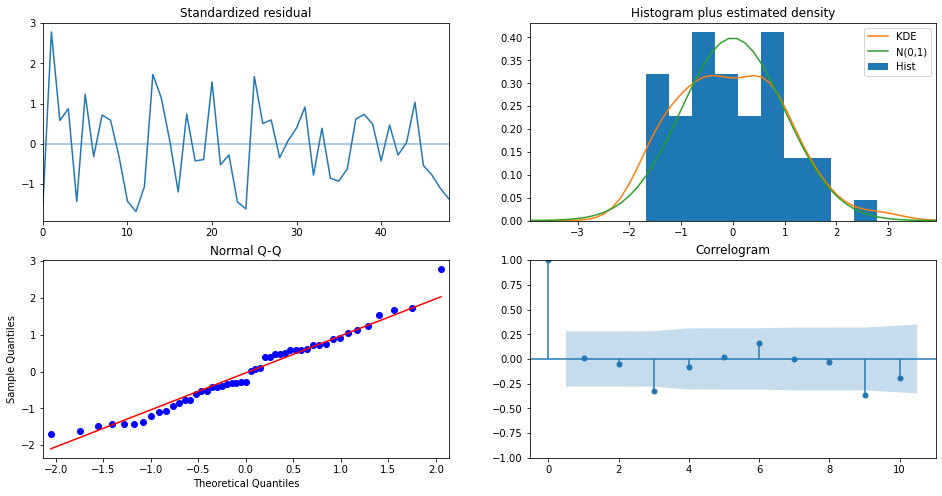

In [203]:
### 잔차분석 시각화
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
"""결과해석
잔차가 백색 잡음을 따르는지 보여주는 플랏은 
Standardized residual과 Correlogram 그림

- Standardized residual은 잔차를 그냥 시계열로 그린 것
백색 잡음 답게 잔차의 시계열이 평균 0을 중심으로 무작위하게 움직임

- Correlogram은 잔차에 대한 ACF
ACF도 어느 정도 허용 범위 안에 위치하여 자기상관이 없음을 알 수 있음


잔차가 정규성을 만족하는지 보여주는 플랏은 
Histogram plus estimated density와 Normal Q-Q 그림

- Histogram plus estimated density는 잔차의 히스토그램을 그려 
  정규 분포 N(0,1)과 밀도를 추정한 그래프를 같이 겹쳐서 보여줌
  위 비대칭도와 첨도에서 확인하셨던 것처럼 정규분포와 비슷하게 대칭적이지만,
  첨도가 더 뾰족하게 솟아오른 것을 알 수 있습니다.

- Normal Q-Q그래프는 Q-Q 플랏으로 정규성을 만족한다면 
  빨간 일직선 위에 점들이 분포해야 함

결과적으로, 적합한 ARIMA(0,1,0)으로 남은 잔차는 백색 잡음이고,
정규성을 따른다고 볼 수 있음
"""

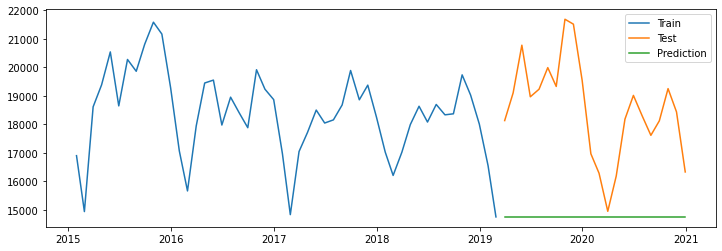

In [204]:
### test set으로 예측

# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [ ]:
"""결과해석
prediction에 해당하는 초록색 선이 일직선으로 예측됨
->auto_arima 모형으로 찾은 ARIMA 모형은 ARIMA (0,1,0) 모형으로, 
1차 차분 시 백색 잡음인 모형입니다. 
결국 아래 식처럼 상수항이 없는 임의 보행 모형 (Random Walk Model)을 따른다는 것을 
알 수 있습니다.
yt−yt−1yt=ϵt=yt−1+ϵt, ϵt∼N(0,σ2)

그런데, 예측을 할 때 innovation term인 ϵt
의 기댓값이 0이기 때문에 이 부분을 0으로 대체하게 됩니다. 
따라서, 예측치들은 결국 가장 마지막 관측치가 되는 것이죠. 
결국, ϵt부분은 0으로 대체되고, 
임의 보행 모형에서는 예측치들이 가장 마지막 관측치로 동일하기 때문에 
일직선을 얻게 되는 것입니다.

그렇다면, auto_arima가 왜 임의 보행 모형을 가장 적합한 모델로 선택했을까요?

데이터에 특정한 주기나 추세가 없기 때문에, 
AIC로 모형을 최적화를 하는 과정에서 의미있는 자기 상관 (AR)이나 
이동 평균 (MA)를 찾기 어려웠기 때문입니다. 
따라서, 최선책으로 임의 보행 모형 
어제의 값이 오늘의 값을 가장 잘 설명한다는 모형이
데이터를 가장 잘 설명한다는 결론을 내립니다. 
결과적으로, 데이터에서 어떠한 구조를 보기 어렵기 때문에, 
가장 마지막 관측치가 가장 좋은 예측치다라 말하고 있는 것

"""

In [ ]:
### 실제로 ARIMA로 양질의 예측을 하려면 위 방법으로는 탐탁치 않습니다. 
### 따라서 한번에 테스트 데이터를 예측하는 것이 아니라, 한 스텝씩 예측하고, 
### 테스트 데이터를 “관측”할 때마다 모형을 업데이트해주는 REFRESH 전략
### -> 생략
### https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/